**Coursebook: Clustering Analysis**
- Part 5 of Python Fundamental Course
- Course Length: 24 Hours
- Last Updated: July 2019

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

The coursebook is part of the **Python Fundamentals Course** prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

# Clustering for Data Mining

## Training Objectives

In this workshop, we'll take a look at some clustering algorithms to complement our data mining techniques. We will also touch the fundamental difference between clustering and classification and how to use both technique effectively in different set of problems.

You will learn to develop clustering analysis and investigate the mathematical foundations for two main algorithm: centroid-based and hierarchical clustering. The main objective will be the following:

- **Unsupervised Learning**
- **Clustering for Data Mining**
- **K-means Clustering**
- **Hierarchical Clustering**

    
By the end of this course, you'll be working on a **Learn-by-Building** module to create a data exploratory analysis project to apply what you have learned on provided dataset and attempt to answer all the given questions. This final part is considered as a Graded Assignment so make sure you do well on the assignment.

Before going into our main topic for this coursebook, let's import the packages we are going to use:

In [11]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler


%matplotlib inline

# Unsupervised Learning

In the previous chapters we've been learning about algorithms that are greatly useful in situations of regression and classification. More generally, we learn to find the parameters for X1, X2 ... Xn to explain or predict a "target" response Y. 

In the case of unsupervised learning, the situation differs in that there is no such a response Y but rather, we're interested in discovering the structure between X1, X2, to Xn - possibly to identify opportunities for clustering. Some people have likened unsupervised learning to an exploratory process because it is difficult or impossible to know if the model or any formulation is the "right" one since we don't have a "ground truth" that we use as a measuring stick. Techniques such as cross-validation and AUC do not apply due to the lack of a "ground truth" label. 

With that said, unsupervised learning methods can still be very powerful especially in the field of clustering and dimensionality reduction. In this workshop, we'll take an in-depth look at unsupervised algorithms such as hierarchical clustering and k-means and see why unsupervised methods such as these are great tools to add to your toolbox.

## K-means Clustering
Clustering refers to the practice of finding meaningful ways to group data (or create subgroups) within a dataset - and the resulting groups are usually called clusters. The objective is to have a number of partitions where the observations that fall into each partition are similar to others in that group, while the partitions are distinctive from one another. 

K-means is a centroid-based clustering algorithm that follows a simple procedure of classifying a given dataset into a pre-determined number of clusters, denoted as "k". This procedure is essentially a series of iterations where we:  
1. Find cluster centers  
2. Compute distances between each point to each cluster centers  
3. Assign / re-assign cluster membership  

A few technicality: Instead of saying "cluster centers", we'll call them "centroids"; Also, in the first iteration of the above procedure, because there are clusters in our feature space, we can't yet compute any centroids so in the first "iteration" we'll randomly assign our centroids. It turns out, with enough iteration, that the procedure can usually converge at a reasonably well solution, giving us very reasonable k centroids (remember: we define k, just as in the k-NN algorithm we learned) that we can use for clustering task.


Let's take a look at the image below:   

![ ](assets/centroids.png)

If we choose _k_ to be 2, these are the steps that a k-means algorithm take in assigning the original data (green dots) to two clusters:  
Step (a): Our data on a two-dimensional space  
Step (b): Iteration 1 - Randomly initialize our cluster centroids  
Step (c): Iteration 1 - Assigning cluster membership based on a distance function  
Step (d): Iteration 2 - Move cluster centroids to be at the center of clusters  
Step (e): Iteration 2 - Re-Assigning cluster membership based on a distance function  
Step (f): Iteration 3 ...

We'll get into the mathematical details a bit later; For now, let's take a look at how we can use Python `KMeans()` function to solve a clustering problem in the absence of a target predictor.

### Cluster-based Whisky Recommendation
The data we'll be reading in is from Dr.Wisehart (University of St. Andrews), and comprise of 86 distilleries that produce malt whiskies. Each of the whiskies were scored between 0-4 under 12 different taste categories including `Body`, `Sweetness`, `Smoky`, `Medicinal`, `Tobacco`, `Honey`, `Nutty`, `Floral` etc. The original motivation also notes that "by using correlation data it may be possible to provide whisky recommendations based upon an individual's particular preferences"[].

In [12]:
whiskies = pd.read_csv("data_input/whiskies.txt", index_col='Distillery')
whiskies = whiskies.drop(labels=['RowID', 'Postcode', ' Latitude', ' Longitude'], axis=1)
whiskies.head()
# Distillery column is the name of each whisky
# remove RowID, Postcode, Latitude and Longitude

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Distillery,,,,,,,,,,,,
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2
Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0
Ardmore,2,2,2,0,0,1,1,1,2,3,1,1


With this dataset - scaling is rather arbitary and optional because all measurements assume the same range (0 to 4), but with most data this won't be the case. Recall that the `kmeans` procedure compute a distance (typically Euclidean distance) and as we've learned in the k-NN section, failing to scale may cause our model to perform adequately with the algorithm favoring variables on higher scales. 

In [13]:
cols = whiskies.columns

whiskies[cols] = StandardScaler().fit_transform(whiskies[cols])

We will have to set a seed for reproducibility because in the first iteration, our centroids are randomly picked on the feature space - thus each time we run the `KMeans()` we are bound to get a slightly different result. Given the objective of **minimizing the within-cluster sum of squared** the k-means algorithm is guaranteed to converge but is not guaranteed to a global optima - a point I'll illustrate later through some code experiment. 

In [14]:
whiskies_cluster = KMeans(n_clusters=4, random_state=0)
whiskies_cluster.fit(whiskies)

whiskies['Cluster'] = whiskies_cluster.labels_

whiskies.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Cluster
Distillery,,,,,,,,,,,,,
Aberfeldy,-0.075425,-0.407651,0.541729,-0.555252,-0.362738,0.891080,-0.491880,1.103454,0.654742,0.316064,0.255099,0.355664,0
Aberlour,1.005673,0.994668,-0.622988,-0.555252,-0.362738,3.249015,2.071859,1.103454,0.654742,1.914975,1.545599,0.355664,0
AnCnoc,-1.156524,0.994668,0.541729,-0.555252,-0.362738,0.891080,-1.773750,-1.053297,0.654742,0.316064,1.545599,0.355664,2
Ardbeg,2.086771,-1.809970,2.871164,3.508717,-0.362738,-1.466855,0.789990,-1.053297,-0.569341,0.316064,-1.035401,-1.997191,1
Ardmore,-0.075425,-0.407651,0.541729,-0.555252,-0.362738,-0.287887,-0.491880,0.025078,0.654742,1.914975,-1.035401,-0.820763,3


In [15]:
whiskies_cluster.n_iter_

9

When we use `n_iter_`, we see that k-means take 9 iterations to converge: it already identified 4 sufficiently distinct clusters and further iteration wouldn't improve it any further. The objective has been satisfied. The original algorithm by Lloyd uses this as the objective (minimizing the within-cluster sum of squares):  

$\sum\limits^k_{i=1}\sum\limits_{x_j \in S_i} (x_j - \mu_i)^2$

Where $\mu_i$ is the mean of all the points in cluster $S_i$

Now let's make this whole idea a lot more concrete by working with some simulated data in code.

### Mathematical Understanding on K-means
In the following experiment, we'll observe how the initialization may not converge to the global optima by simulating some data and changing the seed number iteratively. Here's the code to generate some random data:

In [16]:
# code randomize x1,y1,x2,y2, and save it in a object

np.random.seed(2019)
x1 = np.random.normal(0, 1, 50)
y1 = np.random.normal(0, 1, 50)

x2 = np.random.normal(3, 1, 50)
y2 = np.random.normal(3, 1, 50)

x3 = np.random.normal(0, 1, 50)
y3 = np.random.normal(3, 1, 50)


df = pd.DataFrame({'x':np.concatenate((x1, x2, x3)), 'y':np.concatenate((y1, y2, y3))})

Plotting `x` and `y` from a data will yield the following:

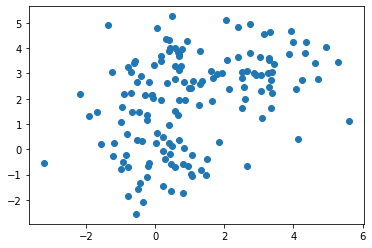

In [17]:
plt.scatter(df.x, df.y)

By eye-balling the data, one may make a reasonable argument that there can be three clusters. I'm going to run `KMeans()` on the simulated data, specifying 3 so the k-means algorithm would use 3 number of clusters. Later, you may want to change the seed from 50 to 100 so you can get a visual idea of how the initialization of our centroids will lead to a rather different outcome:

In [18]:
# code build kmeans clustering using k=3, print centers

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

for center in kmeans.cluster_centers_:
    print(center)

[ 0.03705466 -0.40099858]
[3.29894995 3.14333198]
[0.21373481 2.9045718 ]


With the kmeans model `kmeans`, we'll now plot our clusters (square) and map the color of our points to the assigned clusters from our `cluster_centers_`:

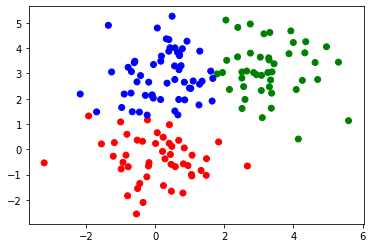

In [19]:
# code plot x and y and adding center
color_dict = {
    '0' : 'red',
    '1' : 'green',
    '2' : 'blue',
    '3' : 'black',
    '4' : 'pink',
    '5' : 'yellow',
    '6' : 'brown'
}

df['cluster'] = kmeans.labels_
df['colors'] = df['cluster'].astype('str').map(color_dict)

plt.scatter(df.x, df.y, c=df.colors)

The `kmeans` model we obtained also has attributes of the following:

In [20]:
kmeans.inertia_

265.09966778260093

This figures as stated in the documentation:

> Sum of squared distances of samples to their closest cluster center.

This can serve as another indicator for the goodness of fit. It can be thought of as how homogeneous each member within the cluster to its designated cluster center - we want a clustering model that has strong properties of internal cohesion and maximal external separation and so a smaller sum of squared of their distance to the center indicates a good fit.

Note that however, we can arbitrarily improve the "goodness" of model by just increasing *k*, so the quality as I've mentioned above is purely mathematical and may not reflect the user's requirement. Often times, as with the case of whiskies clustering, we want to consider external information when picking a good value of k.

Run the function below and observe that our within sum of squares decrease as we naively increase the number of clusters - what we're looking for is a point where diminishing returns start to kick in (an elbow) and we start to lose substantial gains: we'll use that point as the number of clusters (*k*) for our kmeans model:


D:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


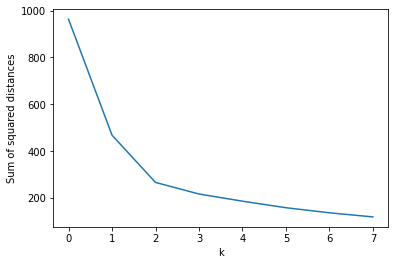

In [21]:
def elbow_plot(data, n=9, cols=['x','y']):
    y = []
    K = range(1,n)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(data[cols])
        y.append(km.inertia_)
    plt.plot(y)
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    
elbow_plot(df)

Since looking at the elbow method indicates that k=2 has the optimal trade off between information gain and number of k, we'll create our new kmeans model using k=2:

In [22]:
# code build kmeans clustering using k=3, print centers

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df[['x','y']])

for center in kmeans.cluster_centers_:
    print(center)

[-0.10526758  0.21250721]
[1.99125469 3.22293684]


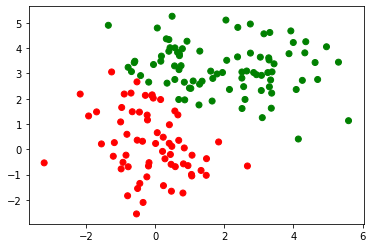

In [23]:
df['cluster'] = kmeans.labels_
df['colors'] = df['cluster'].astype('str').map(color_dict)

plt.scatter(df.x, df.y, c=df.colors)

### Dive Deeper: Whiskies Recommendation
Going back to our `whiskies` dataset. Assuming a long-time customer of ours reveal that him (and his spouse) enjoy Laphroig the most, what other whiskies can we recommend? Create each variable average for the cluster Laphroig is to understand the profile of this cluster.

## Hierarchical Clustering

Another common approach for data clustering is hierarchical clustering. As we have learned in previous section, K-means clustering perform a clustering based on its centroid. In other terms, it is also called centroid-based clustering. While in hierarchical clustering, the approach focused on the similarity between each observation rather than the *center* of a cluster. Before implementing hierarchical clustering using `scikit-learn`, let's first understand the theory behind hierarchical clustering. In this course we will focus with buttom-up appoarch or we called it **agglomerative**. Each observation starts with its own cluster and it will merge together successively into one cluster.

The steps of performing the cluster can be summarized as follow:

1. Calculate distance between each observation  
2. Pair the closest observations and merge them together as 1 cluster  
3. Address the new clustered observations as one observation, and repeat step 1 and 2  
4. Repeat step 1 to 2 until it forms 1 cluster of the dataset  

The most common way in calculating distance between each observation is by using Euclidean distance we have learned in the K-NN section. A shorter distance indicates similarity of observation, hence the most similar pairs of observation are then clustered together. A term commonly known in calculating cluster similarity in hierarchical clustering is called **linkage** and vary in implementation, some of the popular method for example:

- **Complete linkage** minimizes the maximum distance between observations of pairs of clusters.  

- **Average linkage** minimizes the average of the distances between all observations of pairs of clusters. (Similar to centroid)  

- **Single linkage** minimizes the distance between the closest observations of pairs of clusters. (Similar to nearest neighbor)  

- **Ward** minimizes the sum of squared variance difference between clusters  


In using K-means, to finally create a cluster, you would need a defined K for the dataset. While in hierarchical, you can pick how how many cluster you'd like to have by interpreting the dendogram. It is a common visualization tools for hierarchical clustering. We'll jump into the implementation of this clustering approach in the next section.

### Clustering Market Segment

Let's recall back to our online retail dataset we have used in our visualization course. I've saved monthly sales for each country. Now let's take a step back and try to answer this question: Knowing United Kingdom is our main market, how do we further segment our secondary market by looking at our monthly sales?

Let's read our dataset in and jump into the know-how practice:

In [24]:
monthly_sales = pd.read_pickle('data_input/country_sales.pkl')
monthly_sales = monthly_sales.fillna(value=0)
monthly_sales.head()

Year,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06
Country,,,,,,,
Australia,1005.10,9017.71,14627.47,17055.29,333.40,13628.51,23403.81
Austria,257.04,0.00,518.36,1708.12,680.78,1249.43,-24.20
Bahrain,205.74,-205.74,0.00,0.00,0.00,548.40,0.00
Belgium,1809.91,1154.05,2161.32,3333.58,1954.15,2727.00,4110.92
Brazil,0.00,0.00,0.00,0.00,1143.60,0.00,0.00


Since we're trying to segment the second market, we'll remove United Kingdom sales record from our dataset and we're left with 37 countries:

In [25]:
secondary_monthly_sales = monthly_sales[monthly_sales.index != 'United Kingdom']
secondary_monthly_sales.shape

(37, 7)

Recall how in dealing with observation distance, we need to perform data scaling using `StandardScaler()` for our dataset:

In [26]:
monthly_sales_scaled = StandardScaler().fit_transform(secondary_monthly_sales)

D:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Period']. An error will be raised in 1.2.
  FutureWarning,
D:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Period']. An error will be raised in 1.2.
  FutureWarning,


In [43]:
monthly_sales_scaled

array([[-2.78816893e-01,  8.72596225e-01,  2.55960729e+00,
         2.32617948e+00, -4.40330772e-01,  1.41013838e+00,
         3.71954888e+00],
       [-4.99145260e-01, -5.27392691e-01, -4.00527857e-01,
        -2.76670564e-01, -2.93774675e-01, -3.01340494e-01,
        -5.63358031e-01],
       [-5.14254804e-01, -5.59333585e-01, -5.09281397e-01,
        -5.66364379e-01, -5.80988849e-01, -3.98261916e-01,
        -5.58933996e-01],
       [-4.17737768e-02, -3.48227780e-01, -5.58297414e-02,
        -9.95723880e-04,  2.43447207e-01, -9.70579589e-02,
         1.92588976e-01],
       [-5.74852026e-01, -5.27392691e-01, -5.09281397e-01,
        -5.66364379e-01, -9.85156135e-02, -4.74081364e-01,
        -5.58933996e-01],
       [-5.74852026e-01, -5.27392691e-01, -5.09281397e-01,
        -5.42529069e-01, -5.80988849e-01, -4.00219617e-01,
        -3.44777773e-01],
       [-4.67780439e-01, -4.27244777e-01, -1.34843690e-01,
         2.88111327e-02, -4.57375122e-01, -3.49127208e-01,
        -1.8233706

A dendogram gives you a clustered data point with similarity metrics based on the method of our choice. A y axis plotted in a dendogram give you the idea of how similar is one cluster to another measured by linkage linkage method of your choice we have mentioned in the first section. We'll use `scipy`to first create a linkage matrix:

In [52]:
link = shc.linkage(monthly_sales_scaled, method='centroid')

link.shape

(36, 4)

In [49]:
# link = shc.linkage(monthly_sales_scaled, method='ward')

# link.shape

(36, 4)

As stated in the official documentation of scipy `sch.linkage`:

> A  by 4 matrix Z is returned. At the -th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

Let's take a look at our first cluster:

In [28]:
link[0]

array([2.80000000e+01, 3.40000000e+01, 3.08386626e-02, 2.00000000e+00])

The first and second element indicate the country of index 28 and 34, `Unit` and `Saudi Arabia`:

In [29]:
temp = secondary_monthly_sales.reset_index()
temp = temp[temp.index.isin([28,34])]['Country']
temp

28    Saudi Arabia
34            Unit
Name: Country, dtype: object

Recall how we can calculate Euclidean distance using the following formula:

dist(A, B) = $\sqrt{\sum\limits^{m}_{i=1}(x_i-y_i)^2}$

Now we are going to take each monthly sales from Saudi Arabia and Unit and calculate the distance between each observation:

In [32]:
dist = 0
for i in range(0, 7):
    x = monthly_sales_scaled[28,i]
    y = monthly_sales_scaled[34,i]
    dist += (x-y)**2
    
math.sqrt(dist)

0.030838662609437555

In [35]:
secondary_monthly_sales.head()

Year,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06
Country,,,,,,,
Australia,1005.10,9017.71,14627.47,17055.29,333.40,13628.51,23403.81
Austria,257.04,0.00,518.36,1708.12,680.78,1249.43,-24.20
Bahrain,205.74,-205.74,0.00,0.00,0.00,548.40,0.00
Belgium,1809.91,1154.05,2161.32,3333.58,1954.15,2727.00,4110.92
Brazil,0.00,0.00,0.00,0.00,1143.60,0.00,0.00


See how it has the exact same value as our third element in our linkage matrix? It is, fundamentally doing a simple calculation we have learned in the past weeks and store it as a simple matrix. This newly formed cluster between Saudi Arabia and Unit is then merged as the 38th cluster referred in the next agglomerative steps. So how does this value can help us? `scipy` package also shipped in a `dendogram()` method to easily pass the linkage matrix into an interpretable dendogram:

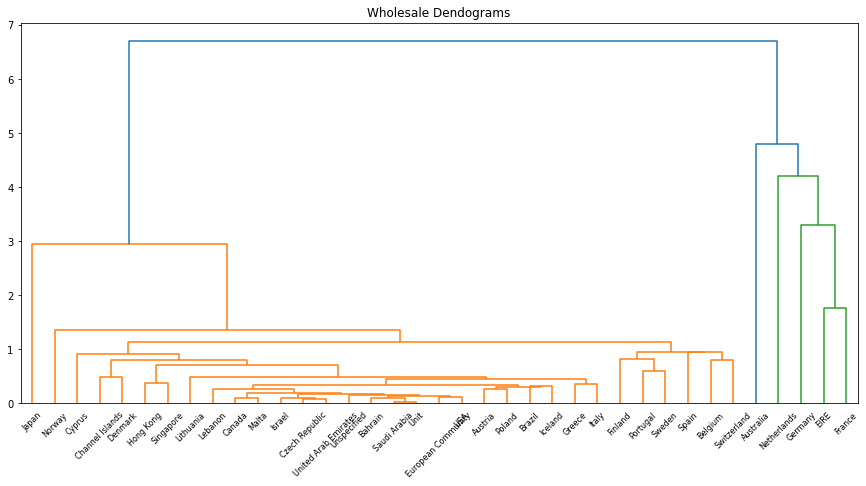

In [58]:
plt.figure(figsize=(15, 7))
plt.title("Wholesale Dendograms")
dend = shc.dendrogram(link, labels=secondary_monthly_sales.index.to_list())
# dend = shc.dendrogram(link)

Within the above dendogram, you'll see the first branch was shown a bit below 7 in y axis, that will divide our countries into two major cluster:
- Australia, Netherlands, Germany, ERIE, France
- The rest of the countries  

This top cluster, is also recorded within our linkage matrix as the last, 36th, element:

In [51]:
link[35]

array([69.        , 71.        , 19.72474591, 37.        ])

If you refer back to our original matrix, the 68th and 71st cluster will be well traced back to each of the observation.

**Dive Deeper:**
Try and reproduce the distance of `6.7` between cluster 68th and 71st by using centroid method and calculate the distance using euclidean distance: 

In [ ]:
# Your answer here



By generating a dendogram, we will be given a more holistic approach of how do we divide our countries based on similarity of each points. You would say that there are a significant difference from the cluster on the far right to the one cluttered on the middle. While on K-means, you are required to specify an optimum K to create a cluster, in hierarchical clustering, the cluster analysis will be based on how you would interpret the dendogram and select number of cluster afterward.

By deciding how many cluster we'd like our data to be divided, we can easily understand how does it separate each observations based on the similarity and how it gives us a better idea of how each of it differ to each other.

**Discussion:**

If you were to assign number of cluster for the store marketing campaign strategy, how many cluster will you established? Why?

### Assigning Cluster Segment

Say for example we'd like to have the cluster divided into 4 clusters. In our model, we see that the 4 cluster will be separated as: 

- Australia
- Netherlands  
- Germany, ERIE, and France 
- The rest of the countries  

If we look in our dendogram we'll see if we cut our tree nodes in order to get 4 cluster, we'd like to cut it with the cophenetic distance above 4.2 (you can check the exact figure by checking the linkage matrix). To then separate our observations into its cluster accordingly, we can use `fcluster` method from `scipy`:

In [59]:
T = shc.fcluster(link, 4.2, criterion='distance')

secondary_monthly_sales['Cluster'] = T

secondary_monthly_sales.head()

D:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Year,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,Cluster
Country,,,,,,,,
Australia,1005.10,9017.71,14627.47,17055.29,333.40,13628.51,23403.81,4
Austria,257.04,0.00,518.36,1708.12,680.78,1249.43,-24.20,1
Bahrain,205.74,-205.74,0.00,0.00,0.00,548.40,0.00,1
Belgium,1809.91,1154.05,2161.32,3333.58,1954.15,2727.00,4110.92,1
Brazil,0.00,0.00,0.00,0.00,1143.60,0.00,0.00,1


In this form, it's way easier to then subset our dataset to get a specific members of each cluster and ease your data exploratory phase.

### Dive Deeper: Comparing Cluster Results

Now going back to our `whiskies` dataset, in the previous dive deeper section, you would have a set of wine selection that you can recommend customer that enjoys Laphroig. Using Hierarchical clustering, which next wine would you then recommend for a customer that enjoys Laphroig? Try to create a dendogram to get a holistic views of the cluster similarity with each other.